In [5]:
import pandas as pd 
import numpy as np 
#from bertopic import BERTopic 
import os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/abstract/wos_0531/bib_360446/dropna_abstract_334765.csv', engine='python')

In [3]:
year = list(df['Publication Year'])

In [4]:
year

[2021.0,
 2021.0,
 2021.0,
 2021.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2019.0,
 2019.0,
 2019.0,
 2019.0,
 2019.0,
 2019.0,
 2019.0,
 2018.0,
 2018.0,
 2018.0,
 2018.0,
 2018.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2015.0,
 2015.0,
 2015.0,
 2015.0,
 2015.0,
 2014.0,
 2012.0,
 2011.0,
 2011.0,
 2011.0,
 2011.0,
 2011.0,
 2011.0,
 2010.0,
 2009.0,
 2009.0,
 2009.0,
 2009.0,
 2007.0,
 2007.0,
 2005.0,
 2003.0,
 2002.0,
 2001.0,
 1999.0,
 1995.0,
 2021.0,
 2021.0,
 2021.0,
 2022.0,
 nan,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2021.0,
 2020.0,
 2021.0,
 2020.0,
 2021.0,
 2021.0,
 2020.0,
 2020.0,
 2020.0,
 2021.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 202

In [5]:
import math
for i in range(len(year)):
    if math.isnan(year[i]):
        year[i]=2021
    else:
        year[i]=int(year[i])

In [6]:
year

[2021,
 2021,
 2021,
 2021,
 2020,
 2020,
 2020,
 2020,
 2020,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2018,
 2018,
 2018,
 2018,
 2018,
 2017,
 2017,
 2017,
 2017,
 2016,
 2016,
 2016,
 2016,
 2016,
 2015,
 2015,
 2015,
 2015,
 2015,
 2014,
 2012,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2010,
 2009,
 2009,
 2009,
 2009,
 2007,
 2007,
 2005,
 2003,
 2002,
 2001,
 1999,
 1995,
 2021,
 2021,
 2021,
 2022,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2020,
 2020,
 2020,
 2020,
 2021,
 2020,
 2021,
 2020,
 2021,
 2021,
 2020,
 2020,
 2020,
 2021,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,

In [7]:
import collections
collections.Counter(year)

Counter({2021: 21967,
         2020: 26163,
         2019: 25738,
         2018: 23687,
         2017: 20195,
         2016: 18589,
         2015: 17626,
         2014: 15842,
         2012: 11718,
         2011: 10900,
         2010: 10806,
         2009: 10947,
         2007: 9030,
         2005: 8074,
         2003: 7691,
         2002: 6836,
         2001: 6571,
         1999: 5694,
         1995: 3759,
         2022: 1067,
         2013: 14120,
         2008: 9933,
         2006: 7710,
         2004: 7772,
         2000: 6863,
         1997: 5425,
         1996: 4353,
         1994: 3660,
         1993: 3316,
         1992: 3219,
         1998: 5494})

In [8]:
first_decade = [0]*len(year)
for i in range(len(year)):
    if year[i]>=1992 and year[i]<=2001:
        first_decade[i]=1
    else:
        first_decade[i]=0
        
second_decade = [0]*len(year)
for i in range(len(year)):
    if year[i]>=2002 and year[i]<=2011:
        second_decade[i]=1
    else:
        second_decade[i]=0
        
third_decade = [0]*len(year)
for i in range(len(year)):
    if year[i]>=2012 and year[i]<=2022:
        third_decade[i]=1
    else:
        third_decade[i]=0

In [9]:
docs_topic_vector = np.load('D:/abstract/wos_0531/bib_360446/384_docs_topic_vec.npy')

In [10]:
docs_vec = docs_topic_vector[:334765]
topic_vec = docs_topic_vector[334765:]

In [6]:
df_label = pd.read_csv('D:/abstract/wos_0531/bib_360446/unique_multilabel_withlabel.csv', engine='python')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/abstract/wos_0531/bib_360446/unique_multilabel_withlabel.csv'

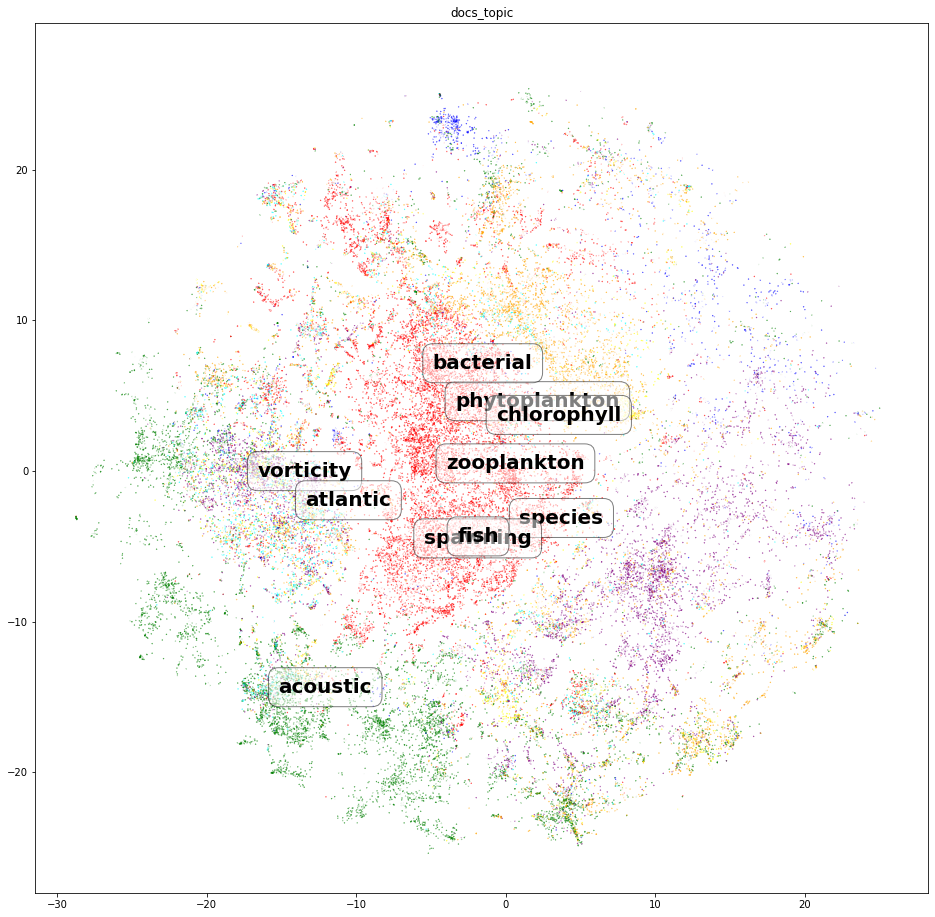

In [65]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
# 青色，紫色，绿色，红色，橙色，蓝色，黄色
col_colors = []
for i in range(len(col)):
    if first_decade[i]==0:
        col_colors.append(colors[7])
    else:
        col_colors.append(colors[col[i]])
        
import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
topic_top10 = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_growth_top10.csv')
topic_top10_first = []
for i in range(100):
    if topic_top10.iloc[0,i]==1:
        topic_top10_first.append(i)
for j in topic_top10_first:
    plt.text(topic_vec[j,0], topic_vec[j,1], topic.loc[j, '0'], fontsize=20, fontweight='black', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

In [49]:
model = BERTopic.load('D:/abstract/wos_0531/bib_360446/bib')

In [51]:
model.get_topics()

{0: [('et', 0.02500726827249042),
  ('evapotranspiration', 0.020304999700124546),
  ('vegetation', 0.01967573576784758),
  ('soil', 0.018990354452570354),
  ('drought', 0.01571836664617726),
  ('moisture', 0.014223403247409179),
  ('crop', 0.013643428629289193),
  ('land', 0.012042712148593985),
  ('water', 0.010985065311187295),
  ('climate', 0.010442390536730883)],
 1: [('species', 0.026379696319423093),
  ('coral', 0.01383797912343705),
  ('benthic', 0.013737503789325284),
  ('diversity', 0.01249491855779898),
  ('communities', 0.012312461583569983),
  ('abundance', 0.012220634444517398),
  ('community', 0.012174629682860028),
  ('assemblages', 0.011241028393013285),
  ('reef', 0.011168801542241138),
  ('habitat', 0.010460852833406248)],
 2: [('basin', 0.012665648504811219),
  ('ma', 0.012377890870475956),
  ('deposits', 0.012271054304844245),
  ('sedimentary', 0.012252473795349512),
  ('formation', 0.011271175504803768),
  ('late', 0.011074751481928146),
  ('facies', 0.010686233620

In [53]:
model.visualize_barchart()

In [54]:
year

[2021,
 2021,
 2021,
 2021,
 2020,
 2020,
 2020,
 2020,
 2020,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2018,
 2018,
 2018,
 2018,
 2018,
 2017,
 2017,
 2017,
 2017,
 2016,
 2016,
 2016,
 2016,
 2016,
 2015,
 2015,
 2015,
 2015,
 2015,
 2014,
 2012,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2010,
 2009,
 2009,
 2009,
 2009,
 2007,
 2007,
 2005,
 2003,
 2002,
 2001,
 1999,
 1995,
 2021,
 2021,
 2021,
 2022,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2020,
 2020,
 2020,
 2020,
 2021,
 2020,
 2021,
 2020,
 2021,
 2021,
 2020,
 2020,
 2020,
 2021,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,

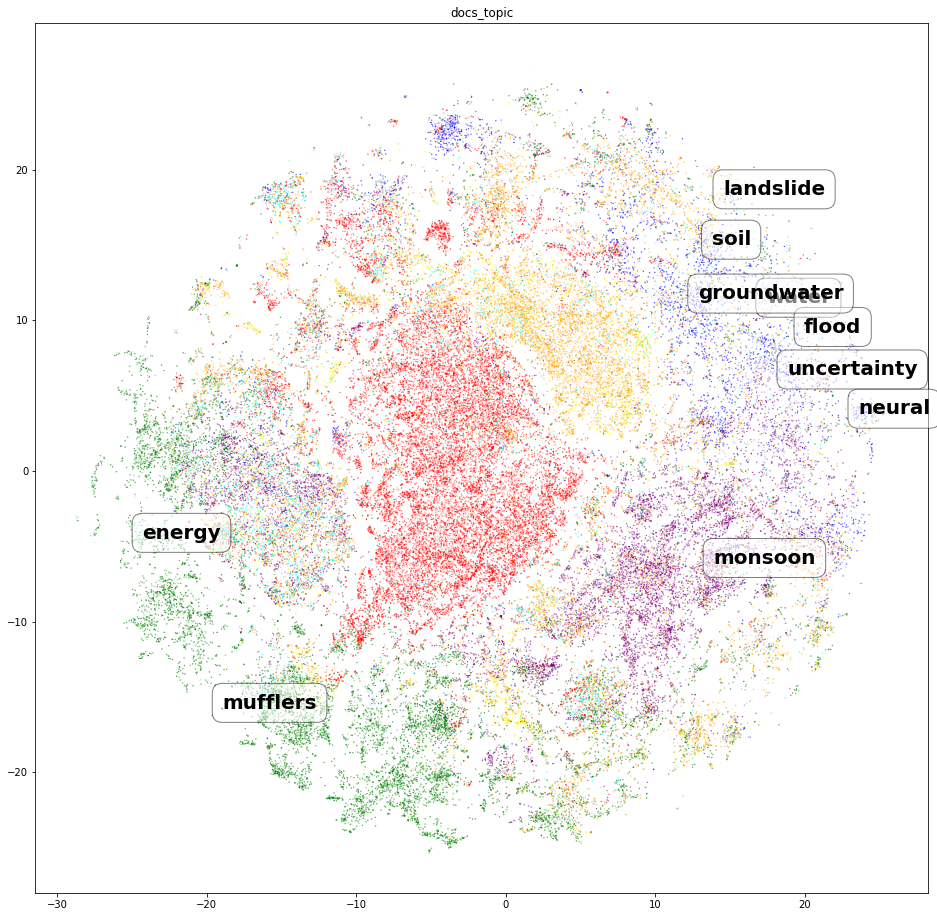

In [64]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
# 青色，紫色，绿色，红色，橙色，蓝色，黄色
col_colors = []
for i in range(len(col)):
    if second_decade[i]==0:
        col_colors.append(colors[7])
    else:
        col_colors.append(colors[col[i]])

import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
topic_top10 = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_growth_top10.csv')
topic_top10_second = []
for i in range(100):
    if topic_top10.iloc[1,i]==1:
        topic_top10_second.append(i)
for j in topic_top10_second:
    plt.text(topic_vec[j,0], topic_vec[j,1], topic.loc[j, '0'], fontsize=20, fontweight='black', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

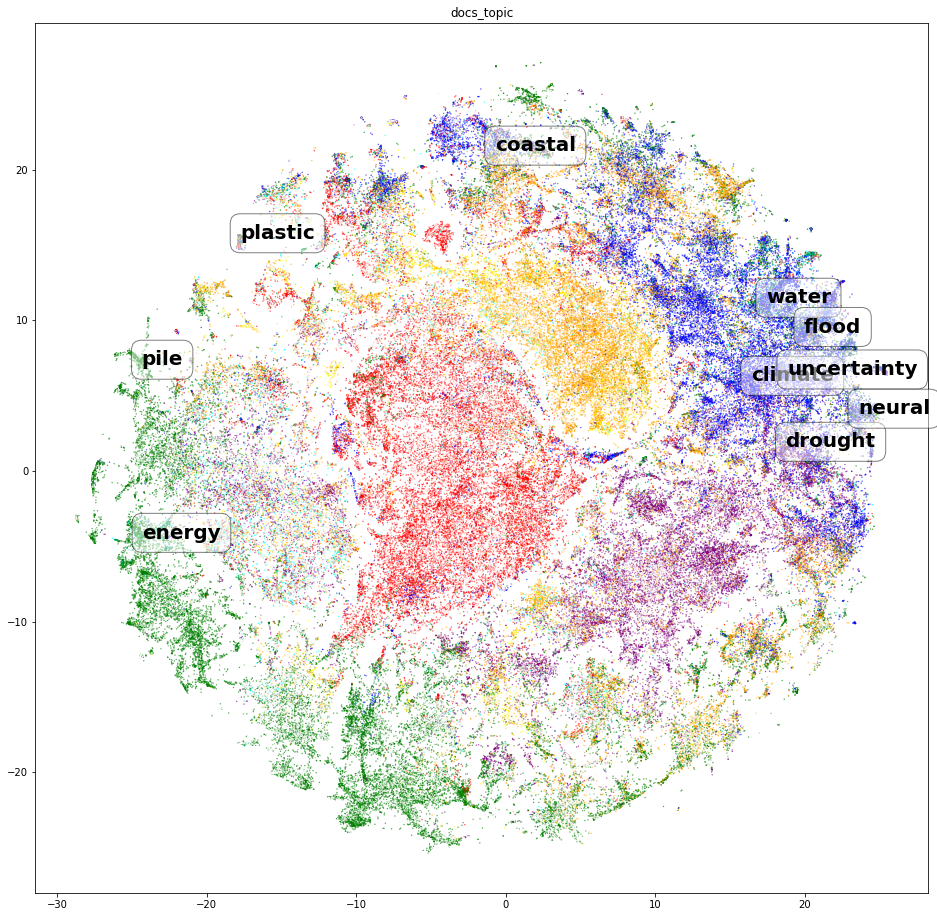

In [63]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
# 青色，紫色，绿色，红色，橙色，蓝色，黄色
col_colors = []
for i in range(len(col)):
    if third_decade[i]==0:
        col_colors.append(colors[7])
    else:
        col_colors.append(colors[col[i]])

import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
topic_top10 = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_growth_top10.csv')
topic_top10_third = []
for i in range(100):
    if topic_top10.iloc[2,i]==1:
        topic_top10_third.append(i)
for j in topic_top10_third:
    plt.text(topic_vec[j,0], topic_vec[j,1], topic.loc[j, '0'], fontsize=20, fontweight='black',bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

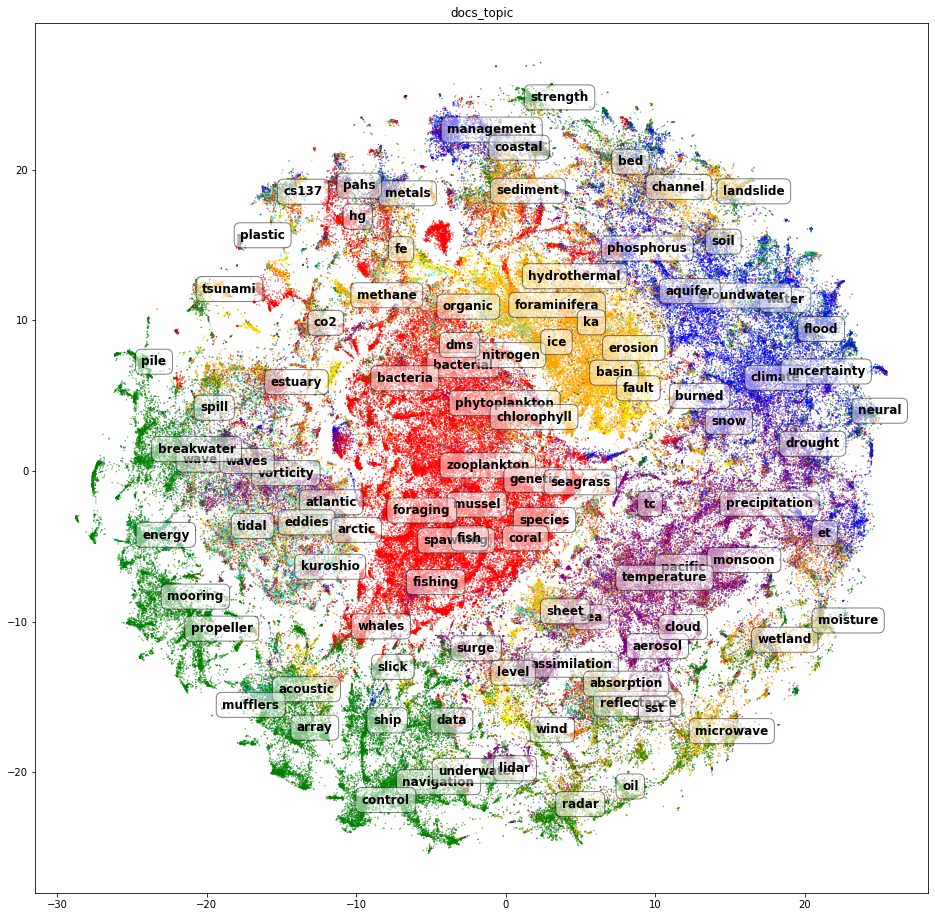

In [25]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])

import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
for i in range(100):
    plt.text(topic_vec[i,0], topic_vec[i,1], topic.loc[i, '0'], fontsize='large', fontweight='black',bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

In [4]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])

import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
for i in range(100):
    plt.text(topic_vec[i,0], topic_vec[i,1], topic.loc[i, '0'], fontsize='large', fontweight='black',bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

NameError: name 'df_label' is not defined

In [29]:
rapid_growth_1 = np.load('D:/abstract/wos_0531/bib_360446/rapid_growth_topic_firstdecade.npy')
rapid_growth_2 = np.load('D:/abstract/wos_0531/bib_360446/rapid_growth_topic_seconddecade.npy')
rapid_growth_3 = np.load('D:/abstract/wos_0531/bib_360446/rapid_growth_topic_thirddecade.npy')

In [30]:
rapid_growth_1

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
rapid_growth_1_vec = docs_vec[rapid_growth_1.astype(int)==1]
rapid_growth_2_vec = docs_vec[rapid_growth_2.astype(int)==1]
rapid_growth_3_vec = docs_vec[rapid_growth_3.astype(int)==1]

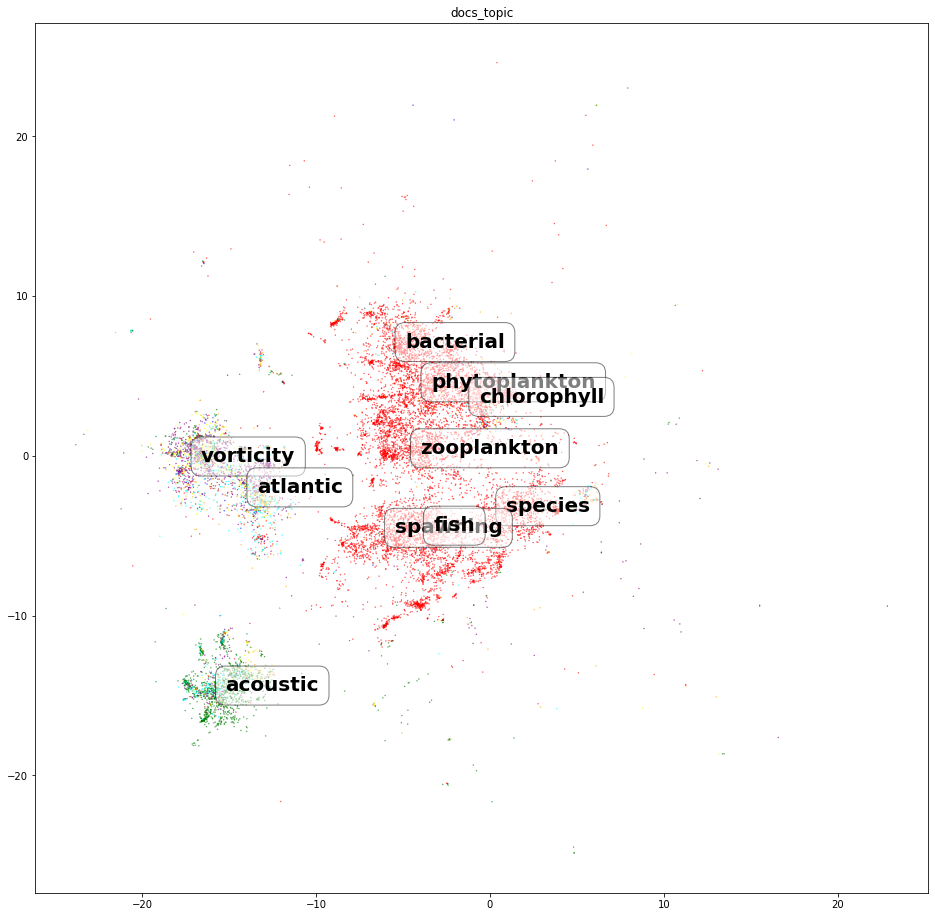

In [60]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])
    
col_1 = np.array(col)[rapid_growth_1.astype(int)==1]
col_colors_1 = np.array(col_colors)[rapid_growth_1.astype(int)==1]

import matplotlib.pyplot as plt

x = list(rapid_growth_1_vec[:,0])
y = list(rapid_growth_1_vec[:,1])
#x_topic = list(topic_vec[:,0])
#y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors_1)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
topic_top10 = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_growth_top10.csv')
topic_top10_first = []
for i in range(100):
    if topic_top10.iloc[0,i]==1:
        topic_top10_first.append(i)
for j in topic_top10_first:
    plt.text(topic_vec[j,0], topic_vec[j,1], topic.loc[j, '0'], fontsize=20, fontweight='black', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

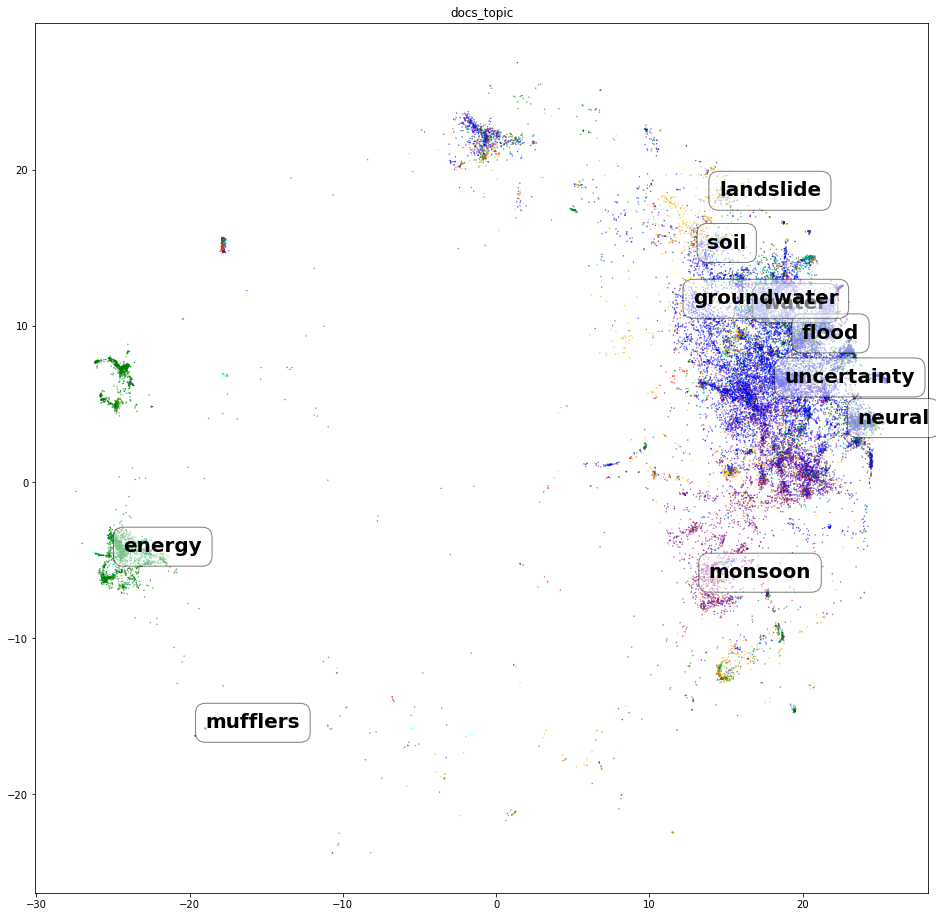

In [61]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])
    
col_2 = np.array(col)[rapid_growth_2.astype(int)==1]
col_colors_2 = np.array(col_colors)[rapid_growth_2.astype(int)==1]

import matplotlib.pyplot as plt

x = list(rapid_growth_2_vec[:,0])
y = list(rapid_growth_2_vec[:,1])
#x_topic = list(topic_vec[:,0])
#y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors_2)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
topic_top10 = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_growth_top10.csv')
topic_top10_second = []
for i in range(100):
    if topic_top10.iloc[1,i]==1:
        topic_top10_second.append(i)
for j in topic_top10_second:
    plt.text(topic_vec[j,0], topic_vec[j,1], topic.loc[j, '0'], fontsize=20, fontweight='black', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

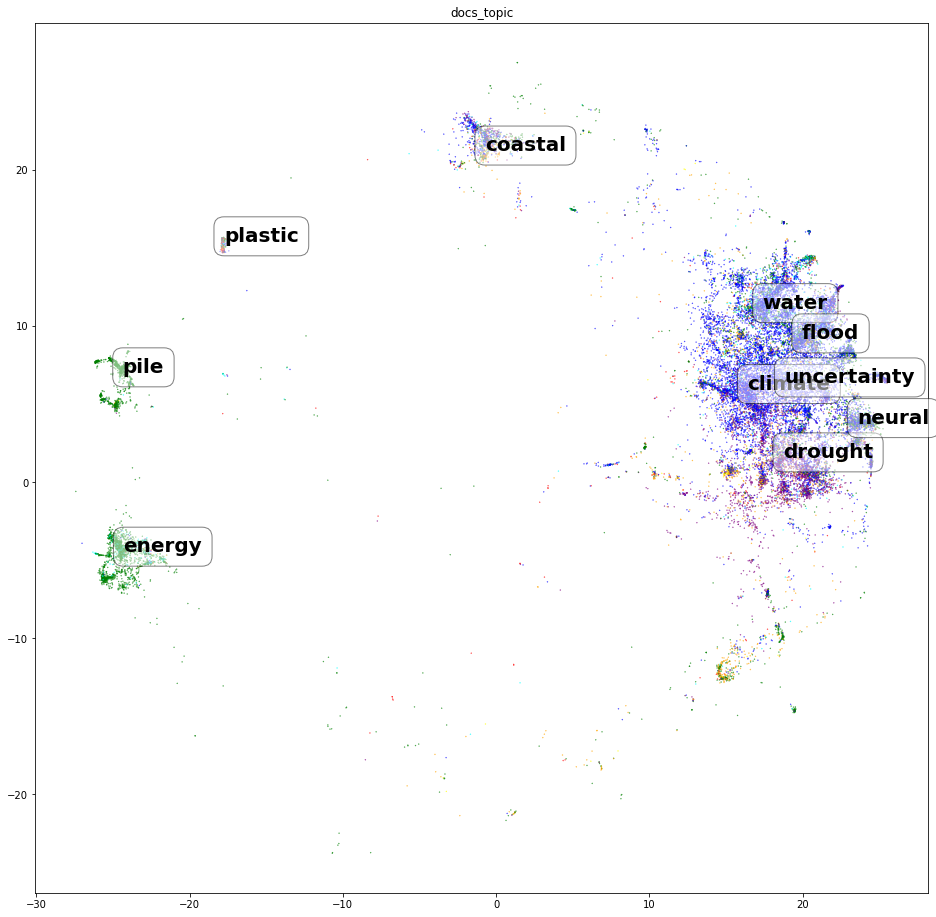

In [62]:
col = list(df_label['index'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])
    
col_3 = np.array(col)[rapid_growth_3.astype(int)==1]
col_colors_3 = np.array(col_colors)[rapid_growth_3.astype(int)==1]

import matplotlib.pyplot as plt

x = list(rapid_growth_3_vec[:,0])
y = list(rapid_growth_3_vec[:,1])
#x_topic = list(topic_vec[:,0])
#y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors_3)
topic = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_name.csv')
topic_top10 = pd.read_csv('D:/abstract/wos_0531/bib_360446/topic_growth_top10.csv')
topic_top10_third = []
for i in range(100):
    if topic_top10.iloc[2,i]==1:
        topic_top10_third.append(i)
for j in topic_top10_third:
    plt.text(topic_vec[j,0], topic_vec[j,1], topic.loc[j, '0'], fontsize=20, fontweight='black',bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()

In [68]:
sum(third_decade)

196712